# Python API Homework - What's the Weather Like?

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* Create a new GitHub repository for this project called `API-Challenge` (note the kebab-case). **Do not add to an existing repo**
* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.

In [111]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Incorporated datetime to get current date
from datetime import date

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count. Redo if less than 500
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
# set lists for the dataframe
city_found = []
cloudiness_lst = []
date_lst = []
humidity_lst = []
lat_lst = []
lng_lst = []
max_temp_lst = []
wind_speed_lst = []
country_lst = []

# set initial counters for iterations thru dataframe
rec_counter = 0
set_counter = 1

# create variables for URL to send API requests
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
target_url = f"{base_url}appid={api_key}&units{units}&q="

#Print report header
print("Beginning of Data Retrieval")
print("----------------------------------------------")

# set For loop. index iterates thru rows while row defines column name
for i in cities:  
    
#Handle exceptions to produce report. Create lists for expanding dataframe
    try:
        response = requests.get(target_url + i)
        response_json = response.json()
        cloudiness_lst.append(response_json['clouds']['all'])
        country_lst.append(response_json['sys']['country'])
        date_lst.append(response_json['dt'])
        humidity_lst.append(response_json['main']['humidity'])
        lat_lst.append(response_json['coord']['lat'])
        lng_lst.append(response_json['coord']['lon'])
        max_temp_lst.append(response_json['main']['temp_max'])
        wind_speed_lst.append(response_json['wind']['speed'])
        
        #Use if conditional to update counters
        if rec_counter > 49:
            rec_counter = 0
            set_counter = set_counter + 1
            city_found.append(i)
        else:
            rec_counter = rec_counter + 1
            set_counter = set_counter
            city_found.append(i)
        print(f"Processing Record {rec_counter} of Set {set_counter} | {i}")
        
    except Exception:
        print("City not found. Skipping...")

#Print report end
print("-----------------------------------------------")
print("Data Retrieval Complete")
print("-----------------------------------------------")

Beginning of Data Retrieval
----------------------------------------------
Processing Record 1 of Set 1 | cayenne
Processing Record 2 of Set 1 | semey
City not found. Skipping...
Processing Record 3 of Set 1 | sao joao da barra
Processing Record 4 of Set 1 | salalah
Processing Record 5 of Set 1 | husavik
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | balloch
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | berlevag
Processing Record 14 of Set 1 | diebougou
Processing Record 15 of Set 1 | lamar
Processing Record 16 of Set 1 | egvekinot
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | itanagar
City not found. Skipping...
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | kavaratti
Processing R

Processing Record 35 of Set 4 | avarua
Processing Record 36 of Set 4 | ossora
Processing Record 37 of Set 4 | marquette
City not found. Skipping...
Processing Record 38 of Set 4 | longyearbyen
Processing Record 39 of Set 4 | obo
Processing Record 40 of Set 4 | necochea
Processing Record 41 of Set 4 | leshukonskoye
Processing Record 42 of Set 4 | katherine
Processing Record 43 of Set 4 | nome
Processing Record 44 of Set 4 | tabuk
Processing Record 45 of Set 4 | hasaki
Processing Record 46 of Set 4 | cooma
Processing Record 47 of Set 4 | saskylakh
Processing Record 48 of Set 4 | klaksvik
Processing Record 49 of Set 4 | cairns
Processing Record 50 of Set 4 | havre-saint-pierre
Processing Record 0 of Set 5 | lebu
Processing Record 1 of Set 5 | mayo
Processing Record 2 of Set 5 | rio grande
Processing Record 3 of Set 5 | aklavik
City not found. Skipping...
Processing Record 4 of Set 5 | karasjok
Processing Record 5 of Set 5 | keningau
Processing Record 6 of Set 5 | kundla
Processing Record 

Processing Record 18 of Set 8 | wucheng
Processing Record 19 of Set 8 | limon
Processing Record 20 of Set 8 | taoudenni
Processing Record 21 of Set 8 | opuwo
Processing Record 22 of Set 8 | wolomin
City not found. Skipping...
Processing Record 23 of Set 8 | mangrol
Processing Record 24 of Set 8 | acarau
Processing Record 25 of Set 8 | teknaf
Processing Record 26 of Set 8 | mpwapwa
Processing Record 27 of Set 8 | cap malheureux
Processing Record 28 of Set 8 | amahai
Processing Record 29 of Set 8 | synya
City not found. Skipping...
Processing Record 30 of Set 8 | viransehir
Processing Record 31 of Set 8 | kununurra
Processing Record 32 of Set 8 | dhidhdhoo
Processing Record 33 of Set 8 | banfora
Processing Record 34 of Set 8 | san ramon
City not found. Skipping...
Processing Record 35 of Set 8 | beceni
Processing Record 36 of Set 8 | uchiza
Processing Record 37 of Set 8 | shuangcheng
Processing Record 38 of Set 8 | fougeres
City not found. Skipping...
Processing Record 39 of Set 8 | kavi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [73]:
#create dataframe with cities first. These have to match the records found at Weather API
new_df = pd.DataFrame(city_found)
new_df.columns = ['City']

#Add remaining cols
new_df['Country'] = country_lst
new_df['Date'] = date_lst
new_df['Cloudiness'] = cloudiness_lst
new_df['Humidity'] = humidity_lst
new_df['Latitude'] = lat_lst
new_df['Longitude'] = lng_lst
new_df['Max Temp'] = max_temp_lst
new_df['Wind Speed'] = wind_speed_lst

#Save to csv. File will be created in the same directory as the current code
new_df.to_csv(output_data_file)

#Verify all fields are populated
new_df.count(axis = 0)

City          549
Country       549
Date          549
Cloudiness    549
Humidity      549
Latitude      549
Longitude     549
Max Temp      549
Wind Speed    549
dtype: int64

In [71]:
#Display dataframe
new_df.head(10)

,City,Country,Date,Cloudiness,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,cayenne,GF,1578958864,90,83,4.93,-52.33,299.15,2.60
1,semey,KZ,1578958864,67,92,50.41,80.23,258.84,1.93
2,sao joao da barra,BR,1578958864,100,92,-21.64,-41.05,297.71,4.21
3,salalah,OM,1578958865,0,25,17.02,54.09,292.15,4.60
4,husavik,IS,1578958865,90,80,66.04,-17.34,274.15,8.70
5,hithadhoo,MV,1578958865,100,72,-0.60,73.08,301.02,4.40
6,balloch,GB,1578958865,98,75,56.00,-4.58,279.26,13.90
7,jamestown,US,1578958865,90,86,42.10,-79.24,277.15,5.10
8,atuona,PF,1578958866,9,76,-9.80,-139.03,300.84,6.83
9,ushuaia,AR,1578958866,90,87,-54.80,-68.30,285.15,3.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

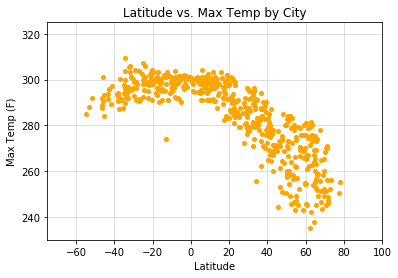

In [130]:
# Create plot
fig, ax = plt.subplots()
ax.errorbar(lat_lst, max_temp_lst, fmt="o", c ="orange", ms = 4, capthick = 1, capsize = 2)

# Format chart area
ax.set_xlim(-75,100)
ax.set_ylim(230,325)
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temp (F)")
ax.grid(alpha = .5)
plt.title("Latitude vs. Max Temp by City")

#Save plot in png format. Show plot
plt.savefig("Lat vs. Max Temp Plot.png")
plt.show()

#### Latitude vs. Humidity Plot

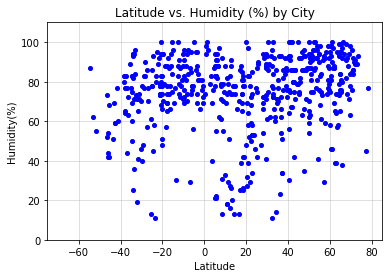

In [129]:
# Create plot
fig, ax = plt.subplots()
ax.errorbar(lat_lst, humidity_lst, fmt="o", c ="blue", ms = 4, capthick = 1, capsize = 2)

# Format chart area
ax.set_xlim(-75,85)
ax.set_ylim(0,110)
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity(%)")
ax.grid(alpha = .5)
plt.title("Latitude vs. Humidity (%) by City")

#Save plot in png format. Show plot
plt.savefig("Lat vs. Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

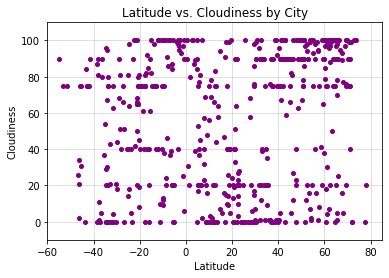

In [143]:
# Create plot
fig, ax = plt.subplots()
ax.errorbar(lat_lst, cloudiness_lst, fmt="o", c ="purple", ms = 4, capthick = 1, capsize = 2)

# Format chart area
ax.set_xlim(-60,85)
ax.set_ylim(-10,110)
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness")
ax.grid(alpha = .5)
plt.title("Latitude vs. Cloudiness by City")

#Save plot in png format. Show plot
plt.savefig("Lat vs. Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

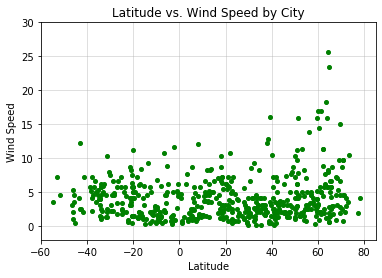

In [146]:
# Create plot
fig, ax = plt.subplots()
ax.errorbar(lat_lst, wind_speed_lst, fmt="o", c ="green", ms = 4, capthick = 1, capsize = 2)

# Format chart area
ax.set_xlim(-60,85)
ax.set_ylim(-2,30)
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed")
ax.grid(alpha = .5)
plt.title("Latitude vs. Wind Speed by City")

#Save plot in png format. Show plot
plt.savefig("Lat vs. Wind Speed.png")
plt.show()

## WeatherPy Observations

In [147]:
#Print report header
print("Beginning of Observations")
print("------------------------------------------------------------------------------------")
print("(1) Elevated temperatures seem to be positively correlated with lower latitudes.")
print("    Cities located in the just above and just below the Equator tend to be warmer")
print("(2) Wind speeds typically range from 0 mph to 15 mph for all cities in the sample")
print("    Few cases for greater speeds have been registered in higher latitudes")
print("    Further statistical analysis is needed to determine correlation levels")
print("(3) No correlation seems to exist for both Humidity (%) and Cloudiness by city")
print("------------------------------------------------------------------------------------")
print("End of Observations")
print("------------------------------------------------------------------------------------")

Beginning of Observations
----------------------------------------------
(1) Elevated temperatures seem to be positively correlated with lower latitudes.
    Cities located in the just above and just below the Equator tend to be warmer
(2) Wind speeds typically range from 0 mph to 15 mph for all cities in the sample
    Few cases for greater speeds have been registered in higher latitudes
    Further statistical analysis is needed to determine correlation levels
(3) No correlation seems to exist for both Humidity (%) and Cloudiness by city
----------------------------------------------
End of Observations
----------------------------------------------
